# Analysis Report
## Breena Smith
### 10/11/2024 - 11/22/2024

So for this project I decided to look into one artist and compare their first ever album, to their newest one. The artist is Taylor Swift, a very beloved artist, or hated depending on who you ask. I like some of her music, but that is besides the point. She has made big changes from the start of her career, to where she is now. And now, in the peak of her popularity I want to see if her songs are more popular than the ones that started her career, based on the difference in the music style or even explicit nature.
So looking into the data, I want to prove more of my hypothesis of the newer stuff being different enough and being more popular due to the explict nature, the energy and loudness, less acousticness. 

In [1]:
import urllib
import requests
import pandas as pd
import json
import base64
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
def get_session_token(SessionID, Sessionkey):

    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type': 'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ":" + Sessionkey).encode("ascii"))
                                   
    header  = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url, data = data, headers = header)
    print(response.status_code)
    return response.json()['access_token']

In [3]:
keys = pd.read_csv (r"C:\Users\thegr\Documents\keys.txt")

In [4]:
keys

,Client_ID,Client_Secret
0,b276461e15d743daa8c0f468e7cff058,ff2edd58d3844d67bfaa7672e7478140


In [5]:
access_token = get_session_token(keys ['Client_ID'].iloc[0], keys['Client_Secret'].iloc[0])

200


In [6]:
t_features_ep = 'https://api.spotify.com/v1/audio-features'
tracks_ep = 'https://api.spotify.com/v1/tracks'
ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'

In [7]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

In [8]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

As my comment hear says, I wanted to compare all I could between two of her albums. The first one I picked as her first ever album, Taylor Swift. It was in 2006, the start of her grow to fame. The second one I picked is her latest album, The Tortured Poet which came out this year, 2024. So to keep track of the two albums without making it too hard to repeat some steps I made a letter difference between the two. 

In [9]:
#ots is old taylor swift, nts is new taylor swift

In [10]:
ots_album_id = '7mzrIsaAjnXihW3InKjlC3'
nts_album_id = '1Mo4aZ8pdj6L1jx8zSwJnt'

In [11]:
ab_tracks_ep.format(ots_album_id)

'https://api.spotify.com/v1/albums/7mzrIsaAjnXihW3InKjlC3/tracks'

In [12]:
ab_tracks_ep.format(nts_album_id)

'https://api.spotify.com/v1/albums/1Mo4aZ8pdj6L1jx8zSwJnt/tracks'

In [13]:
ots_album_response = api_call(ab_tracks_ep.format(ots_album_id), session_header)
nts_album_response = api_call(ab_tracks_ep.format(nts_album_id), session_header)

200
200


In [14]:
ots_album_response.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [15]:
ots_album_df = pd.DataFrame(ots_album_response['items'])
nts_album_df = pd.DataFrame(nts_album_response['items'])

In [16]:
ots_album_df.head()

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,name,preview_url,track_number,type,uri,is_local
0,[{'external_urls': {'spotify': 'https://open.s...,"[CA, US]",1,232106,False,{'spotify': 'https://open.spotify.com/track/0O...,https://api.spotify.com/v1/tracks/0Om9WAB5RS09...,0Om9WAB5RS09L80DyOfTNa,Tim McGraw,None,1,track,spotify:track:0Om9WAB5RS09L80DyOfTNa,False
1,[{'external_urls': {'spotify': 'https://open.s...,"[CA, US]",1,173066,False,{'spotify': 'https://open.spotify.com/track/32...,https://api.spotify.com/v1/tracks/32mVHdy0bi1X...,32mVHdy0bi1XKgr0ajsBlG,Picture To Burn,None,2,track,spotify:track:32mVHdy0bi1XKgr0ajsBlG,False
2,[{'external_urls': {'spotify': 'https://open.s...,"[CA, US]",1,203040,False,{'spotify': 'https://open.spotify.com/track/7z...,https://api.spotify.com/v1/tracks/7zMcNqs55Mxe...,7zMcNqs55Mxer82bvZFkpg,Teardrops On My Guitar - Radio Single Remix,None,3,track,spotify:track:7zMcNqs55Mxer82bvZFkpg,False
3,[{'external_urls': {'spotify': 'https://open.s...,"[CA, US]",1,199200,False,{'spotify': 'https://open.spotify.com/track/73...,https://api.spotify.com/v1/tracks/73OX8GdpOeGz...,73OX8GdpOeGzKC6OvGSbsv,A Place in this World,None,4,track,spotify:track:73OX8GdpOeGzKC6OvGSbsv,False
4,[{'external_urls': {'spotify': 'https://open.s...,"[CA, US]",1,239013,False,{'spotify': 'https://open.spotify.com/track/7a...,https://api.spotify.com/v1/tracks/7an1exwMnfYR...,7an1exwMnfYRcdVQm0yDev,Cold As You,None,5,track,spotify:track:7an1exwMnfYRcdVQm0yDev,False


In [17]:
#ots_album_df['id'].to_list()

In [18]:
ots_tracks_ids = ','.join(ots_album_df['id'].to_list())
nts_tracks_ids = ','.join(nts_album_df['id'].to_list())

In [19]:
t_features_ep + '?ids={}'.format(ots_tracks_ids)

'https://api.spotify.com/v1/audio-features?ids=0Om9WAB5RS09L80DyOfTNa,32mVHdy0bi1XKgr0ajsBlG,7zMcNqs55Mxer82bvZFkpg,73OX8GdpOeGzKC6OvGSbsv,7an1exwMnfYRcdVQm0yDev,2QA3IixpRcKyOdG7XDzRgv,6K0CJLVXqbGMeJSmJ4ENKK,2ZoOmCSgj0ypVAmGd1ve4y,16MVSD0mGI4RMQT83Qzm69,2QrQCMel6v2JiLxqrg4p2O,15DeqWWQB4dcEWzJg15VrN,0JIdBrXGSJXS72zjF9ss9u,5OOd01o2YS1QFwdpVLds3r,1spLfUJxtyVyiKKTegQ2r4,4pJi1rVt9GNegU9kywjg4z'

In [20]:
ots_track_features = api_call(t_features_ep + '?ids={}'.format(ots_tracks_ids), session_header)
nts_track_features = api_call(t_features_ep + '?ids={}'.format(nts_tracks_ids), session_header)

200
200


In [21]:
ots_track_features.keys()

dict_keys(['audio_features'])

In [22]:
#ots_track_features['audio_features']

In [23]:
ots_features_df = pd.DataFrame(ots_track_features['audio_features'])
nts_features_df = pd.DataFrame(nts_track_features['audio_features'])
ots_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.580,0.491,0,-6.462,1,0.0251,0.575,0.0,0.1210,0.425,76.009,audio_features,0Om9WAB5RS09L80DyOfTNa,spotify:track:0Om9WAB5RS09L80DyOfTNa,https://api.spotify.com/v1/tracks/0Om9WAB5RS09...,https://api.spotify.com/v1/audio-analysis/0Om9...,232107,4
1,0.658,0.877,7,-2.098,1,0.0323,0.173,0.0,0.0962,0.821,105.586,audio_features,32mVHdy0bi1XKgr0ajsBlG,spotify:track:32mVHdy0bi1XKgr0ajsBlG,https://api.spotify.com/v1/tracks/32mVHdy0bi1X...,https://api.spotify.com/v1/audio-analysis/32mV...,173067,4
2,0.621,0.417,10,-6.941,1,0.0231,0.288,0.0,0.1190,0.289,99.953,audio_features,7zMcNqs55Mxer82bvZFkpg,spotify:track:7zMcNqs55Mxer82bvZFkpg,https://api.spotify.com/v1/tracks/7zMcNqs55Mxe...,https://api.spotify.com/v1/audio-analysis/7zMc...,203040,4
3,0.576,0.777,9,-2.881,1,0.0324,0.051,0.0,0.3200,0.428,115.028,audio_features,73OX8GdpOeGzKC6OvGSbsv,spotify:track:73OX8GdpOeGzKC6OvGSbsv,https://api.spotify.com/v1/tracks/73OX8GdpOeGz...,https://api.spotify.com/v1/audio-analysis/73OX...,199200,4
4,0.418,0.482,5,-5.769,1,0.0266,0.217,0.0,0.1230,0.261,175.558,audio_features,7an1exwMnfYRcdVQm0yDev,spotify:track:7an1exwMnfYRcdVQm0yDev,https://api.spotify.com/v1/tracks/7an1exwMnfYR...,https://api.spotify.com/v1/audio-analysis/7an1...,239013,4


In [24]:
nts_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.504,0.386,11,-10.976,1,0.0308,0.5020,0.000015,0.0961,0.281,192.004,audio_features,2OzhQlSqBEmt7hmkYxfT6m,spotify:track:2OzhQlSqBEmt7hmkYxfT6m,https://api.spotify.com/v1/tracks/2OzhQlSqBEmt...,https://api.spotify.com/v1/audio-analysis/2Ozh...,228965,4
1,0.604,0.428,0,-8.441,1,0.0255,0.0483,0.000000,0.1260,0.292,110.259,audio_features,3NMrVbIVWT3fPXBj0rNDKG,spotify:track:3NMrVbIVWT3fPXBj0rNDKG,https://api.spotify.com/v1/tracks/3NMrVbIVWT3f...,https://api.spotify.com/v1/audio-analysis/3NMr...,293048,4
2,0.596,0.563,0,-7.362,1,0.0269,0.1370,0.000000,0.3020,0.481,97.073,audio_features,2XXwLdtuAcE0HSCu61ijAb,spotify:track:2XXwLdtuAcE0HSCu61ijAb,https://api.spotify.com/v1/tracks/2XXwLdtuAcE0...,https://api.spotify.com/v1/audio-analysis/2XXw...,203801,4
3,0.541,0.366,11,-10.412,1,0.0748,0.5600,0.000001,0.0946,0.168,159.707,audio_features,2F3N9tdombb64aW6VtZOdo,spotify:track:2F3N9tdombb64aW6VtZOdo,https://api.spotify.com/v1/tracks/2F3N9tdombb6...,https://api.spotify.com/v1/audio-analysis/2F3N...,261228,4
4,0.423,0.533,9,-11.388,1,0.3220,0.7300,0.002640,0.0816,0.248,160.218,audio_features,3Vevii7qKqrmW8CcyzBHDl,spotify:track:3Vevii7qKqrmW8CcyzBHDl,https://api.spotify.com/v1/tracks/3Vevii7qKqrm...,https://api.spotify.com/v1/audio-analysis/3Vev...,262975,4


In [25]:
ots_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(ots_tracks_ids), session_header)
nts_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(nts_tracks_ids), session_header)

200
200


In [26]:
ots_track_info.keys()

dict_keys(['tracks'])

In [27]:
#ots_track_info['tracks']

In [28]:
ots_track_df = pd.DataFrame(ots_track_info['tracks'])
nts_track_df = pd.DataFrame(nts_track_info['tracks'])
ots_track_df.head()

,album,artists,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,232106,False,{'isrc': 'USCJY0603008'},{'spotify': 'https://open.spotify.com/track/0O...,https://api.spotify.com/v1/tracks/0Om9WAB5RS09...,0Om9WAB5RS09L80DyOfTNa,False,True,Tim McGraw,60,None,1,track,spotify:track:0Om9WAB5RS09L80DyOfTNa
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,173066,False,{'isrc': 'USCJY0603250'},{'spotify': 'https://open.spotify.com/track/32...,https://api.spotify.com/v1/tracks/32mVHdy0bi1X...,32mVHdy0bi1XKgr0ajsBlG,False,True,Picture To Burn,63,None,2,track,spotify:track:32mVHdy0bi1XKgr0ajsBlG
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,203040,False,{'isrc': 'USCJY0603137'},{'spotify': 'https://open.spotify.com/track/7z...,https://api.spotify.com/v1/tracks/7zMcNqs55Mxe...,7zMcNqs55Mxer82bvZFkpg,False,True,Teardrops On My Guitar - Radio Single Remix,60,None,3,track,spotify:track:7zMcNqs55Mxer82bvZFkpg
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,199200,False,{'isrc': 'USCJY0603001'},{'spotify': 'https://open.spotify.com/track/73...,https://api.spotify.com/v1/tracks/73OX8GdpOeGz...,73OX8GdpOeGzKC6OvGSbsv,False,True,A Place in this World,52,None,4,track,spotify:track:73OX8GdpOeGzKC6OvGSbsv
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,239013,False,{'isrc': 'USCJY0603020'},{'spotify': 'https://open.spotify.com/track/7a...,https://api.spotify.com/v1/tracks/7an1exwMnfYR...,7an1exwMnfYRcdVQm0yDev,False,True,Cold As You,53,None,5,track,spotify:track:7an1exwMnfYRcdVQm0yDev


In [29]:
nts_track_df.head()

,album,artists,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,228965,False,{'isrc': 'USUG12401028'},{'spotify': 'https://open.spotify.com/track/2O...,https://api.spotify.com/v1/tracks/2OzhQlSqBEmt...,2OzhQlSqBEmt7hmkYxfT6m,False,True,Fortnight (feat. Post Malone),84,None,1,track,spotify:track:2OzhQlSqBEmt7hmkYxfT6m
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,293048,True,{'isrc': 'USUG12401029'},{'spotify': 'https://open.spotify.com/track/3N...,https://api.spotify.com/v1/tracks/3NMrVbIVWT3f...,3NMrVbIVWT3fPXBj0rNDKG,False,True,The Tortured Poets Department,69,None,2,track,spotify:track:3NMrVbIVWT3fPXBj0rNDKG
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,203801,False,{'isrc': 'USUG12401030'},{'spotify': 'https://open.spotify.com/track/2X...,https://api.spotify.com/v1/tracks/2XXwLdtuAcE0...,2XXwLdtuAcE0HSCu61ijAb,False,True,My Boy Only Breaks His Favorite Toys,70,None,3,track,spotify:track:2XXwLdtuAcE0HSCu61ijAb
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,261228,True,{'isrc': 'USUG12401031'},{'spotify': 'https://open.spotify.com/track/2F...,https://api.spotify.com/v1/tracks/2F3N9tdombb6...,2F3N9tdombb64aW6VtZOdo,False,True,Down Bad,75,None,4,track,spotify:track:2F3N9tdombb64aW6VtZOdo
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,262974,False,{'isrc': 'USUG12401032'},{'spotify': 'https://open.spotify.com/track/3V...,https://api.spotify.com/v1/tracks/3Vevii7qKqrm...,3Vevii7qKqrmW8CcyzBHDl,False,True,"So Long, London",70,None,5,track,spotify:track:3Vevii7qKqrmW8CcyzBHDl


In [30]:
ots_merged = pd.merge(ots_features_df, ots_track_df, how = 'inner', on = 'id')
#ots_merged

In [31]:
#ots_merged.columns

In [32]:
ots = ots_merged.drop(columns = ['uri_y', 'mode','disc_number','external_ids','external_urls',
                           'is_local','is_playable','uri_x','href','album','type_y','type_x','analysis_url','artists'])

In [33]:
nts_merged = pd.merge(nts_features_df, nts_track_df, how = 'inner', on = 'id')
#nts_merged

In [34]:
nts = nts_merged.drop(columns = ['uri_y', 'mode','disc_number','external_ids','external_urls',
                           'is_local','is_playable','uri_x','href','album','type_y','type_x','analysis_url','artists'])

In [35]:
album_compare = pd.concat([ots, nts], axis = 0)
album_compare

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,track_href,duration_ms_x,time_signature,duration_ms_y,explicit,name,popularity,preview_url,track_number
0,0.580,0.491,0,-6.462,0.0251,0.57500,0.000000,0.1210,0.425,76.009,0Om9WAB5RS09L80DyOfTNa,https://api.spotify.com/v1/tracks/0Om9WAB5RS09...,232107,4,232106,False,Tim McGraw,60,None,1
1,0.658,0.877,7,-2.098,0.0323,0.17300,0.000000,0.0962,0.821,105.586,32mVHdy0bi1XKgr0ajsBlG,https://api.spotify.com/v1/tracks/32mVHdy0bi1X...,173067,4,173066,False,Picture To Burn,63,None,2
2,0.621,0.417,10,-6.941,0.0231,0.28800,0.000000,0.1190,0.289,99.953,7zMcNqs55Mxer82bvZFkpg,https://api.spotify.com/v1/tracks/7zMcNqs55Mxe...,203040,4,203040,False,Teardrops On My Guitar - Radio Single Remix,60,None,3
3,0.576,0.777,9,-2.881,0.0324,0.05100,0.000000,0.3200,0.428,115.028,73OX8GdpOeGzKC6OvGSbsv,https://api.spotify.com/v1/tracks/73OX8GdpOeGz...,199200,4,199200,False,A Place in this World,52,None,4
4,0.418,0.482,5,-5.769,0.0266,0.21700,0.000000,0.1230,0.261,175.558,7an1exwMnfYRcdVQm0yDev,https://api.spotify.com/v1/tracks/7an1exwMnfYR...,239013,4,239013,False,Cold As You,53,None,5
5,0.589,0.805,5,-4.055,0.0293,0.00491,0.000000,0.2400,0.591,112.982,2QA3IixpRcKyOdG7XDzRgv,https://api.spotify.com/v1/tracks/2QA3IixpRcKy...,207107,4,207106,False,The Outside,50,None,6
6,0.479,0.578,2,-4.963,0.0294,0.52500,0.000000,0.0841,0.192,146.165,6K0CJLVXqbGMeJSmJ4ENKK,https://api.spotify.com/v1/tracks/6K0CJLVXqbGM...,248107,4,248106,False,Tied Together with a Smile,51,None,7
7,0.594,0.629,8,-4.919,0.0246,0.08680,0.000000,0.1370,0.504,131.597,2ZoOmCSgj0ypVAmGd1ve4y,https://api.spotify.com/v1/tracks/2ZoOmCSgj0yp...,236053,4,236053,False,Stay Beautiful,51,None,8
8,0.476,0.777,4,-3.771,0.0289,0.01030,0.000000,0.1960,0.472,167.964,16MVSD0mGI4RMQT83Qzm69,https://api.spotify.com/v1/tracks/16MVSD0mGI4R...,242200,4,242200,False,Should've Said No,59,None,9
9,0.403,0.627,2,-5.280,0.0292,0.01770,0.000000,0.1820,0.374,74.900,2QrQCMel6v2JiLxqrg4p2O,https://api.spotify.com/v1/tracks/2QrQCMel6v2J...,213080,4,213080,False,Mary's Song (Oh My My My),54,None,10


Looking between the two of the albums, it shows that my inital thoughts were mostly correct. Her orignal album isn't as popular and didn't age with her, rather her new songs are the hot ticket item. That the changes she made with her energy or loudness helped, as well as adding some explict items. Her switch from country and pop, the change of her image, the works. It all lead to her fame, and shows that she made the right choices because her stuff does sound alot alike, it is very different from how she started off. It works for her. 

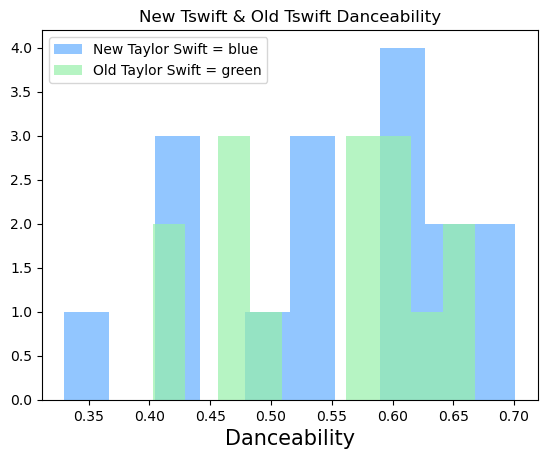

In [53]:
fig1, ax1= plt.subplots()
ax1.set_title('New Tswift & Old Tswift Danceability')
ax1.set_xlabel('Danceability', fontsize = 15)
ax1.hist(nts['danceability'])
ax1.hist(ots['danceability'], alpha = .7)
ax1.legend(['New Taylor Swift = blue', 'Old Taylor Swift = green'])
plt.style.use('seaborn-v0_8-pastel')
plt.show()

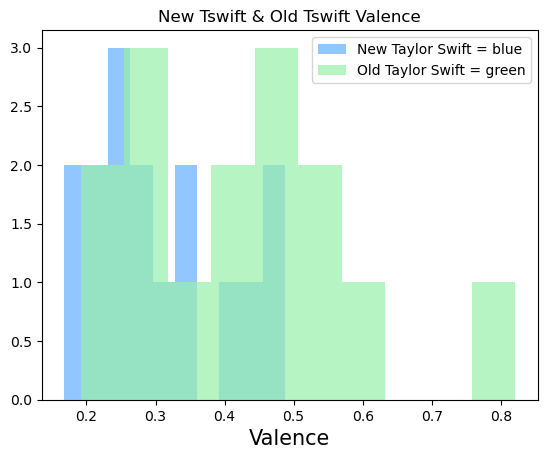

In [54]:
fig2, ax2= plt.subplots()
ax2.set_title('New Tswift & Old Tswift Valence')
ax2.set_xlabel('Valence', fontsize = 15)
ax2.hist(nts['valence'])
ax2.hist(ots['valence'], alpha = .7)
ax2.legend(['New Taylor Swift = blue', 'Old Taylor Swift = green'])
plt.style.use('seaborn-v0_8-pastel')
plt.show()

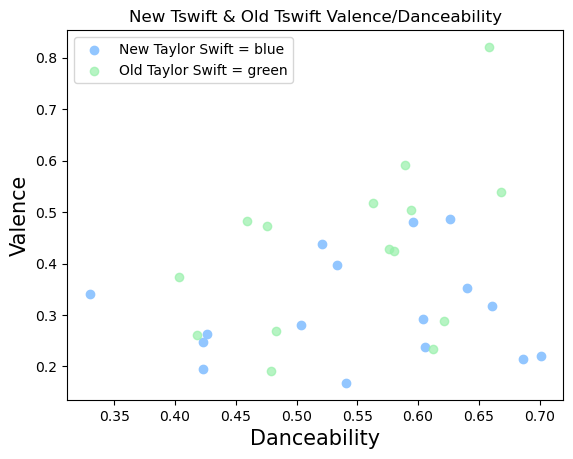

In [59]:
fig3, ax3= plt.subplots()
ax3.set_title('New Tswift & Old Tswift Valence/Danceability')
ax3.set_ylabel('Valence', fontsize = 15)
ax3.set_xlabel('Danceability', fontsize = 15)
ax3.scatter(nts['danceability'], nts['valence'])
ax3.scatter(ots['danceability'],ots['valence'], alpha = .7)
ax3.legend(['New Taylor Swift = blue', 'Old Taylor Swift = green'])
plt.style.use('seaborn-v0_8-pastel')
plt.show()

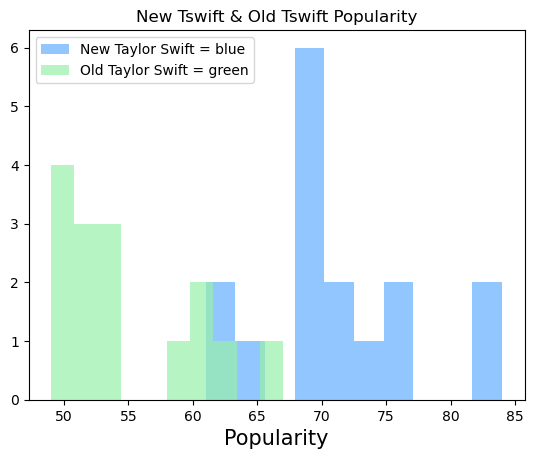

In [56]:
fig4, ax4= plt.subplots()
ax4.set_title('New Tswift & Old Tswift Popularity')
ax4.set_xlabel('Popularity', fontsize = 15)
ax4.hist(nts['popularity'])
ax4.hist(ots['popularity'], alpha = .7)
ax4.legend(['New Taylor Swift = blue', 'Old Taylor Swift = green'])
plt.style.use('seaborn-v0_8-pastel')
plt.show()

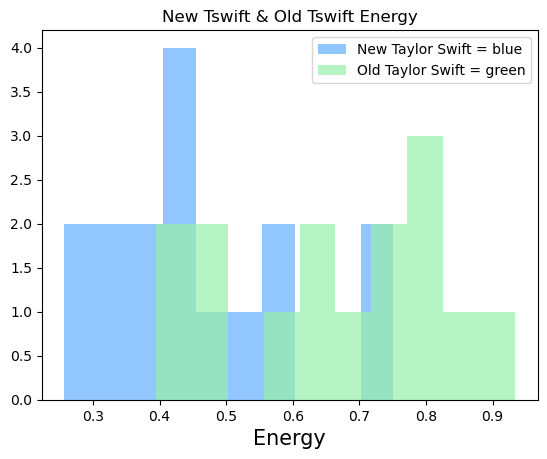

In [60]:
fig5, ax5= plt.subplots()
ax5.set_title('New Tswift & Old Tswift Energy')
ax5.set_xlabel('Energy', fontsize = 15)
ax5.hist(nts['energy'])
ax5.hist(ots['energy'], alpha = .7)
ax5.legend(['New Taylor Swift = blue', 'Old Taylor Swift = green'])
plt.style.use('seaborn-v0_8-pastel')
plt.show()

Showing the graphs and charts above, some of them prove my point about the danceability or valence being higher in the new taylor swift songs, which then show how her newer songs are more popular. However I thought the energy in her newer stuff would be higher, but I was surprised to see that on the chart it was infact her older songs that were spread out more in the higher parts, showing it in fact has more of the energy. It was fascinating to see. 